In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
torch.manual_seed(1)
data = pd.read_csv("cancer.csv") #cargamos el archivo con los datos
ejem = 450

In [4]:
x=torch.tensor(data.iloc[:ejem,:9].values,dtype=torch.float32)
t=torch.tensor(data.iloc[0:ejem,9:].values,dtype=torch.float32)
x_test=torch.tensor(data.iloc[ejem:,:9].values,dtype=torch.float32)
t_test=torch.tensor(data.iloc[ejem:,9:].values,dtype=torch.float32)

In [5]:
input_units = 9
hidden_units= 5
output_units = 1
epocas=2000

0 0.2446330040693283
500 0.023964717984199524
1000 0.015331863425672054
1500 0.01233863364905119
0 0.37084463238716125
500 0.027801331132650375
1000 0.025304622948169708
1500 0.024477986618876457
0 0.434073269367218
500 0.033010441809892654
1000 0.032044269144535065
1500 0.03188495337963104
0 0.4042662978172302
500 0.02295822650194168
1000 0.02238425612449646
1500 0.02233949303627014


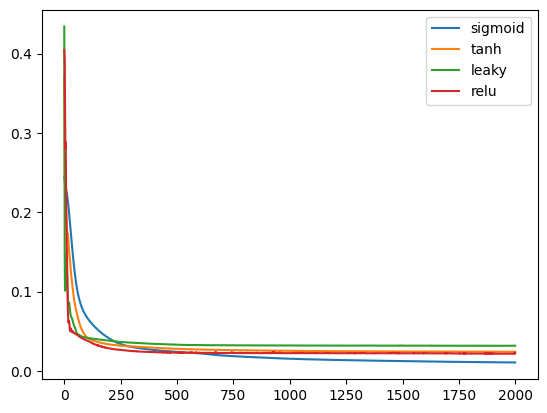

In [18]:
active=['sigmoid','tanh','leaky', 'relu']
accu=[]

for k in active:
    if k=='sigmoid':
        act = nn.Sigmoid()
    if k=='tanh':
        act = nn.Tanh()
    if k=='leaky':
        act = nn.LeakyReLU()
    if k=='relu':
        act = nn.ReLU()
            
    model = nn.Sequential(nn.Linear(input_units, hidden_units), \
                          act, \
                          nn.Linear(hidden_units, output_units), \
                          act, )    
        
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_funct = nn.MSELoss()   
    losses = []
    
    for i in range(epocas):
        y_pred = model(x)
        loss = loss_funct(y_pred, t)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
        
        if i%500 == 0:
            print(i, loss.item())
    
    #print(model[0].weigth)
    plt.plot(range(0,epocas), losses,label=k)
    #evaluamos la red

    t_pred = model(x_test)

    t_pred[t_pred>=0.5]=1
    t_pred[t_pred<0.5]=0

    evalu=torch.eq(t_test,t_pred)
    positive = torch.count_nonzero(evalu == True)
    negative = torch.count_nonzero(evalu == False)
    #print(positive,'\n')
    accc=100*positive/(positive+negative)
    #print("Accuracy : ", 100*positive/(positive+negative))
    plt.legend()
    accu.append(accc)

In [16]:

print('Precision de cada metodo \n' ,accu)


Precision de cada metodo 
 [tensor(96.1207), tensor(95.2586), tensor(98.7069), tensor(98.7069)]
